<h1>SpaceX  Falcon 9 first stage Landing Prediction</h1>

---

# 3.2 Exploring and Preparing Data


### Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib - Seaborn and Plotly`

- Exploratory Data Analysis
- Preparing Data Feature Engineering


----


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

## Exploratory Data Analysis


Previously refined data:

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(3)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch.


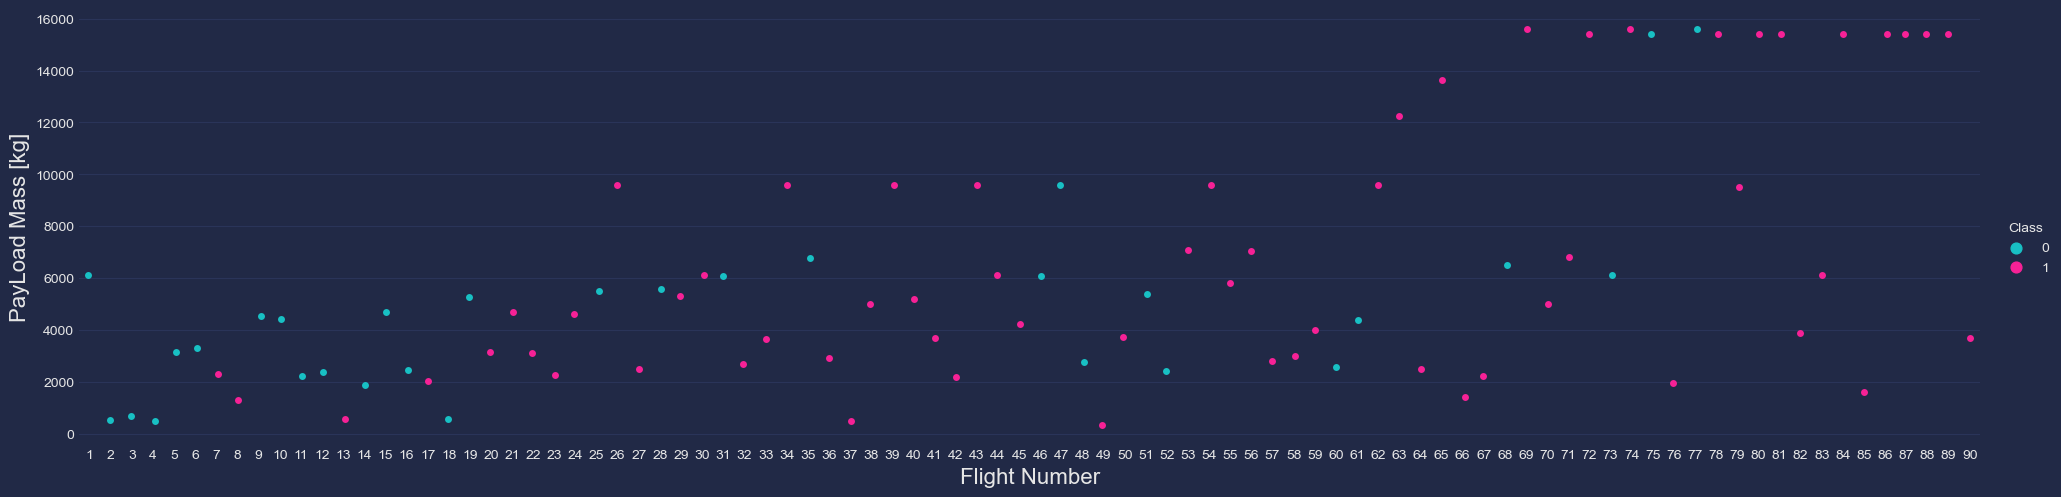

In [3]:
sns.catplot(y= "PayloadMass", x= "FlightNumber", hue= "Class", data= df, aspect = 4)
plt.xlabel("Flight Number", fontsize= 16); plt.ylabel("PayLoad Mass [kg]", fontsize= 16)

plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

### 1. Relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


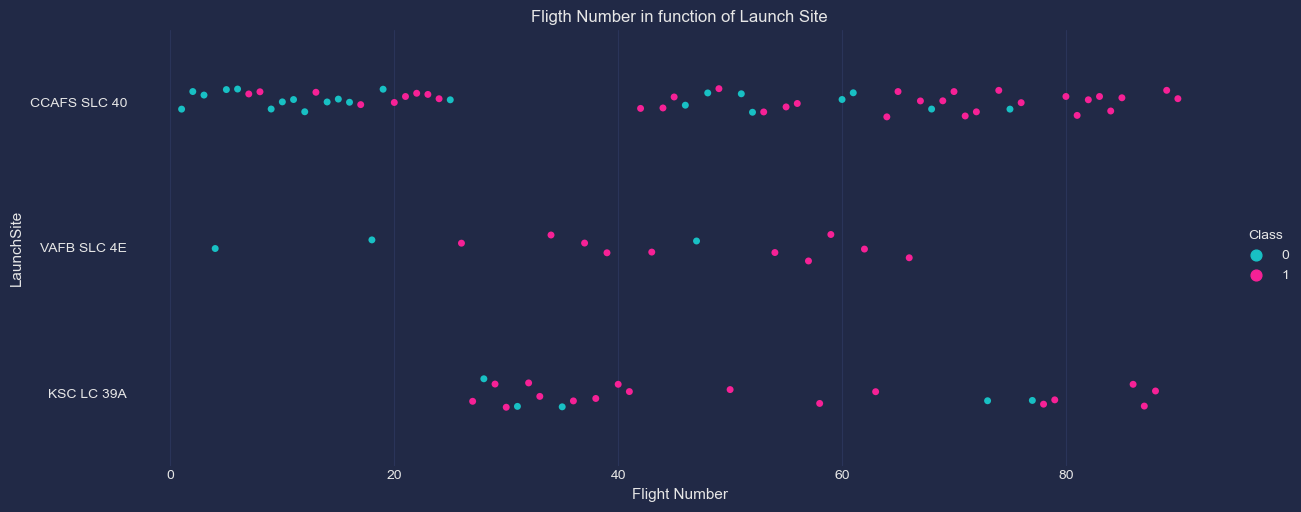

In [4]:
sns.catplot(data= df, x= "FlightNumber", y= "LaunchSite", hue= "Class", aspect = 2.5)
plt.title('Fligth Number in function of Launch Site')
plt.xlabel("Flight Number", fontsize= 11); plt.ylabel("LaunchSite", fontsize= 11)

plt.show()

The highest density of missed landings occurred in the first flights, where the main launch area was Cape Canaberal, where the success rate progressively improved in the last recorded flights.


It could be said that the launches from the other two registered sites have a higher local success rate, however this would ignore that the vast majority of flights depart from Cape Canaberales, which includes almost all the first flights made, which were the more prone to failure, it is more pertinent to point out that as the number of flights increases, the tendency to succeed also increases, a behavior that is seen uniformly at all launch sites.

 Which leads us to think that there is no particular correlation between the success or failure of a mission based on its launch site.

### 2. Relationship between Payload and Launch Site


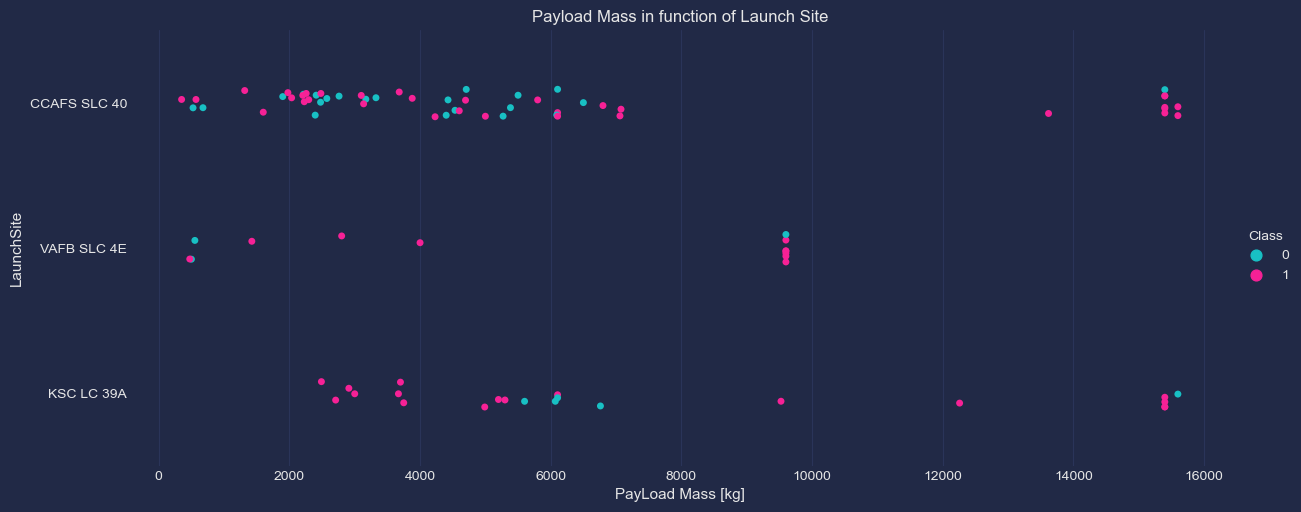

In [5]:
sns.catplot(data= df, x= "PayloadMass", y= "LaunchSite", hue= "Class", aspect = 2.5)
plt.title('Payload Mass in function of Launch Site')
plt.xlabel("PayLoad Mass [kg]", fontsize= 11); plt.ylabel("LaunchSite", fontsize= 11)

plt.show()

Now if we notice that for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass; greater than $10000\:kg$.


### 3. Relationship between success rate of each orbit type


In [6]:
types = df['Orbit'].unique()
vals = df.groupby('Orbit')['Class'].mean().values * 100

fig = px.bar( x= types, y= vals,
              title = 'Relation between Success Rate and Orbit type',
              color = vals, color_continuous_scale= 'blues', template = "plotly_dark")
fig.update_layout(yaxis_title= 'Percentage [%]', xaxis_title= 'Orbit')
fig.update_layout( coloraxis_colorbar= dict(title= " %") )

fig.show()


Where LEO, SO, ISS and GTO have a $100\%$ success rate.




### 4. Relationship between FlightNumber and Orbit type


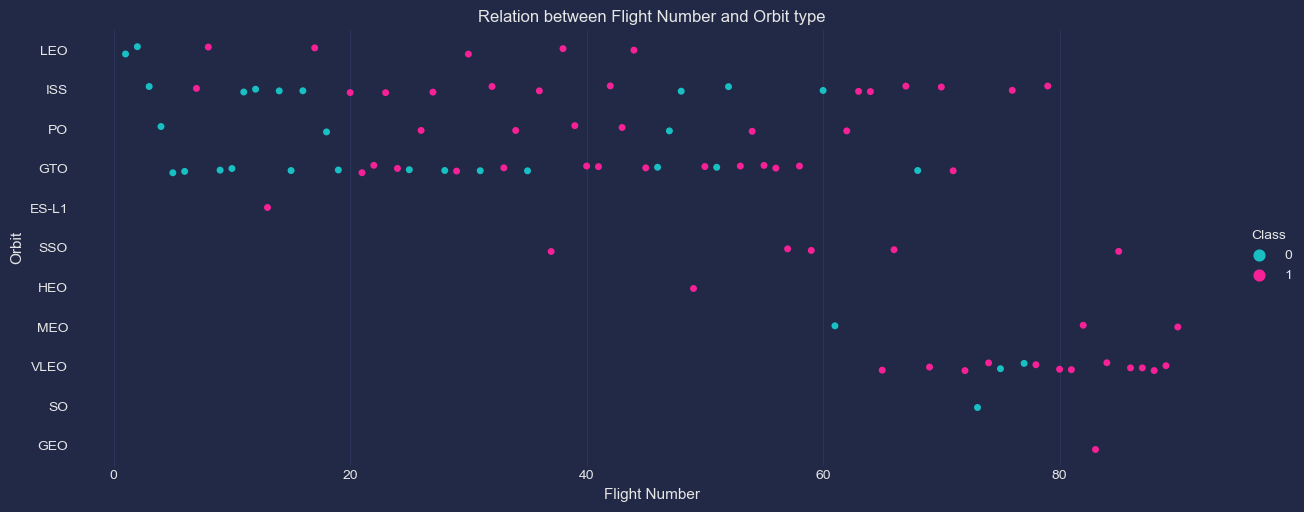

In [7]:
sns.catplot(data= df, y = 'Orbit', x = "FlightNumber", hue= "Class", aspect = 2.5)
plt.title('Relation between Flight Number and Orbit type')
plt.xlabel("Flight Number", fontsize= 11); plt.ylabel("Orbit", fontsize= 11)

plt.show()

It seems that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in any other orbit.


### 5. Relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


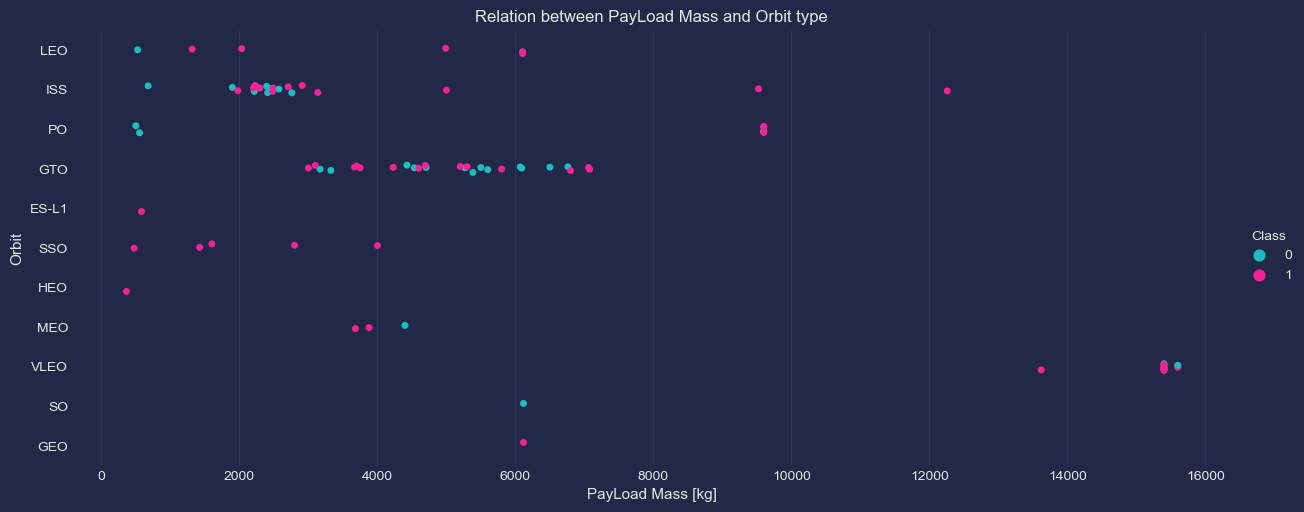

In [8]:
sns.catplot(data= df, y = 'Orbit', x = "PayloadMass", hue= "Class", aspect = 2.5)
plt.title('Relation between PayLoad Mass and Orbit type')
plt.xlabel("PayLoad Mass [kg]", fontsize= 11); plt.ylabel("Orbit", fontsize= 11)

plt.show()

With heavy payloads the successful landing or positive landing rate are more common for PO ,LEO and ISS orbits.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing are both fairly uniformly distributed.




### 6. Launch success yearly trend


In [9]:
# Extract years from date
def years(df):
  years = []
  for date in df["Date"]: # YYYY - MM - DD  format
    years.append( date.split("-")[0] )
  return years
years = set( years(df) )
print(years)

df['Year'] = df['Date'].map( lambda x : x.split("-")[0] )
vals = df.groupby('Year')['Class'].mean().values * 100
print(vals)

{'2016', '2018', '2020', '2014', '2013', '2017', '2019', '2012', '2010', '2015'}
[ 0.          0.          0.         33.33333333 33.33333333 62.5
 83.33333333 61.11111111 90.         84.21052632]


In [10]:
fig = px.line(title = 'Success rate over Time', template = "plotly_dark")
fig.add_scatter(x= sorted(list(years)), y= vals, fill = 'tonexty', mode = 'lines', line_color = 'cornflowerblue')
fig.update_layout(yaxis_title= 'Percentage [%]', xaxis_title= 'Year')

fig.show()

It is clear that over time the success rate improved steadily; since 2013 it kept increasing until 2020.

This may be attributed to refined technology and experience.


## Features Engineering


By now, we possess some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction subsequently.


In [11]:
features = ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
            'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']
X = df[features]

y = df['Class']

 ### 7. Create dummy variables to categorical columns


We consider the no binary categorical columns, the other are continous or already binary.

In [12]:
categorical_data = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
X = pd.get_dummies(data = X, columns = categorical_data, drop_first = False)

print(X.shape)
X.head()

(90, 80)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 8. Cast all numeric columns to `float64`


In [13]:
# val: True -> 1.0  | val: False -> 0.0
X = X.astype('float64')

Export DataFrame to a <b>CSV</b>


In [14]:
X.to_csv('df_3.csv', index=False)